In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

In [19]:
path = 'movie_data.csv'
data = pd.read_csv(path, sep=';', decimal='.')

# Also make it datetime instead of a string
data['release_date'] = pd.to_datetime(data['release_date'])

# TODO - Must be deleted, only for quick use now...
# data = data[0:100]




# Trabajo A

### Summary Statistics:

Use descriptive statistics like mean, median, mode, and standard deviation to understand the central tendency and spread of numerical variables such as 'budget,' 'popularity,' 'revenue,' 'runtime,' 'vote average,' and 'vote count.'

In [20]:
def describex(data):
        data = pd.DataFrame(data)
        stats = data.describe()
        skewness = data.skew()
        kurtosis = data.kurtosis()
        skewness_df = pd.DataFrame({'skewness':skewness}).T
        kurtosis_df = pd.DataFrame({'kurtosis':kurtosis}).T
        return stats.append([kurtosis_df,skewness_df])

describex(data)

,budget,popularity,production_companies,production_countries,revenue,runtime,spoken_languages,vote_average,vote_count
count,5.465000e+03,5464.000000,5476.000000,5479.000000,5.473000e+03,5472.000000,5460.000000,5463.000000,5468.000000
mean,3.124037e+07,9.256444,2.925676,1.357364,9.071296e+07,110.247442,1.482784,6.287937,724.587052
std,3.912379e+07,6.019158,2.166273,0.772884,1.578984e+08,21.470544,0.921282,0.902441,1193.095062
min,1.000000e+00,0.003013,0.000000,0.000000,1.001800e+04,26.000000,0.000000,0.000000,0.000000
25%,6.000000e+06,5.652154,1.000000,1.000000,8.038061e+06,95.750000,1.000000,5.700000,84.000000
50%,1.800000e+07,8.526302,2.000000,1.000000,3.106304e+07,106.000000,1.000000,6.300000,287.000000
75%,4.000000e+07,11.804164,4.000000,2.000000,1.026162e+08,120.000000,2.000000,6.900000,807.000000
max,3.800000e+08,54.581997,26.000000,12.000000,2.068224e+09,338.000000,9.000000,9.100000,14075.000000
kurtosis,8.300140e+00,8.553008,11.675515,15.515255,2.175073e+01,6.645048,8.677693,1.942463,16.802205
skewness,2.520551e+00,2.004190,2.335237,2.947490,3.871868e+00,1.638618,2.545726,-0.650780,3.523913


### Bar Plots:
For categorical variables like 'genres' and 'spoken languages,' use bar plots to show the frequency of each category. This provides insights into the composition of your dataset.

- Genres (count)
- year (count)

### box plots
- Revenue, runtime (in one plot)
- Revenue (per genre)

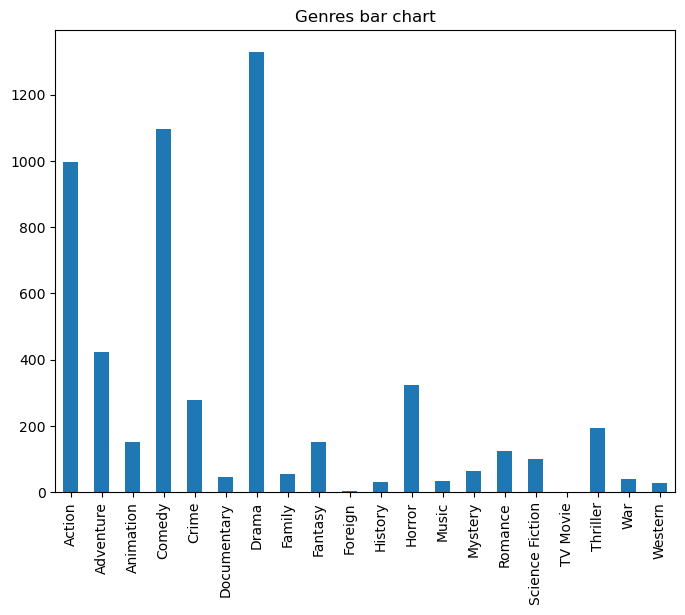

In [27]:
fig_size = [8, 6]

def plot_bar(data, column=None, title=None, large=False):
    if column is None:
        raise ValueError('column must be specified')
   
    # Sort the DataFrame by 'release_year'
    data_sorted = data.sort_values(by=column)

    if large:
        # Plot only every 10th label
        subset_labels = data_sorted[column].unique()[::10]
        subset_data = data_sorted[data_sorted[column].isin(subset_labels)]
    
    fig, ax = plt.subplots(figsize=(fig_size[0], fig_size[1]))
    data_sorted[column].value_counts().sort_index().plot(kind='bar', ax=ax)
    ax.set_title(title)
    plt.show()

# Genres plot
plot_bar(data, column='genres', title='Genres bar chart')

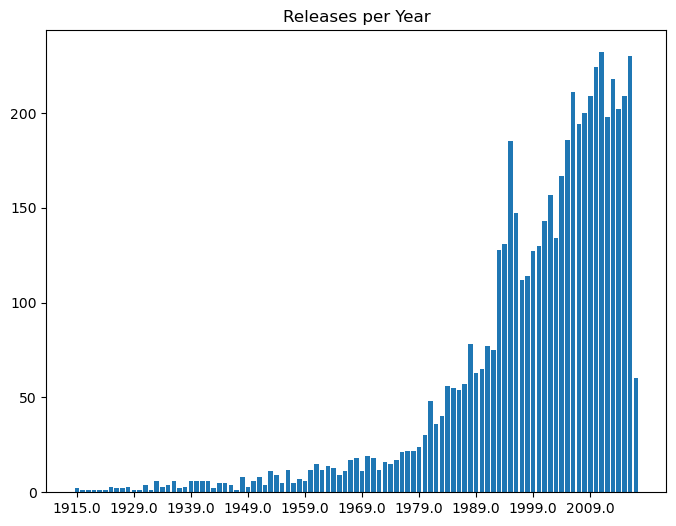

In [31]:
data_sorted = data.sort_values(by='release_year')
fig_size = [8, 6]
plt.figure(figsize=(fig_size[0], fig_size[1]))

counts = data_sorted['release_year'].value_counts().sort_index()
plt.bar(range(len(counts)), counts)

# Customize x-axis tick positions and labels (show every 10th label)
n = 10
plt.xticks(range(0, len(counts), n), counts.index[::n])

plt.title('Releases per Year')
plt.show()

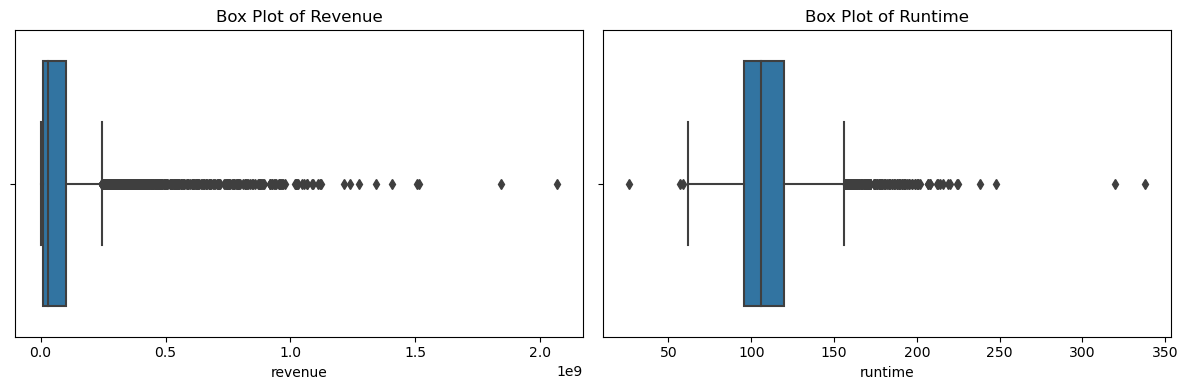

In [23]:
# Create two box plots side by side
plt.figure(figsize=(12, 4))

# Box Plot for 'revenue'
plt.subplot(1, 2, 1)
sns.boxplot(x='revenue', data=data)
plt.title('Box Plot of Revenue')

# Box Plot for 'runtime'
plt.subplot(1, 2, 2)
sns.boxplot(x='runtime', data=data)
plt.title('Box Plot of Runtime')

plt.tight_layout()
plt.show()

### Scatter Plots

- budget - revenue
- budget - popularity
- runtime - vote_average
- release _date - popularity

In [24]:
data.head(1)

,budget,genres,imdb_id,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,vote_average,vote_count,release_year
0,30000000.0,Animation,tt0114709,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,1.0,1.0,1995-10-30,373554033.0,81.0,1.0,7.7,5415.0,1995.0


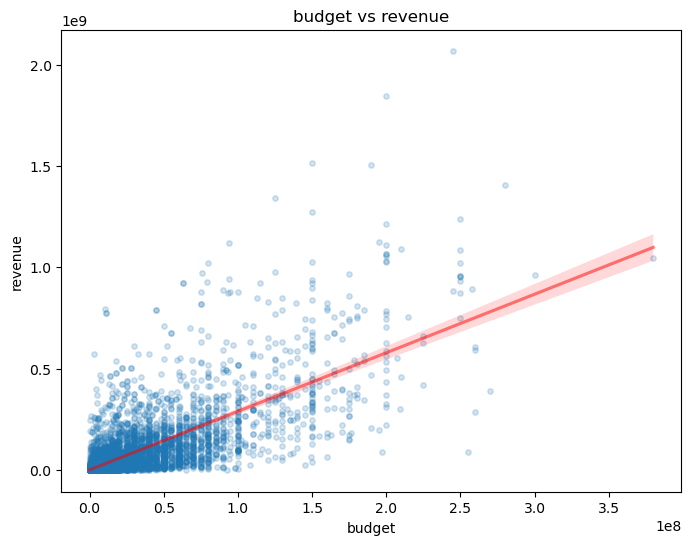

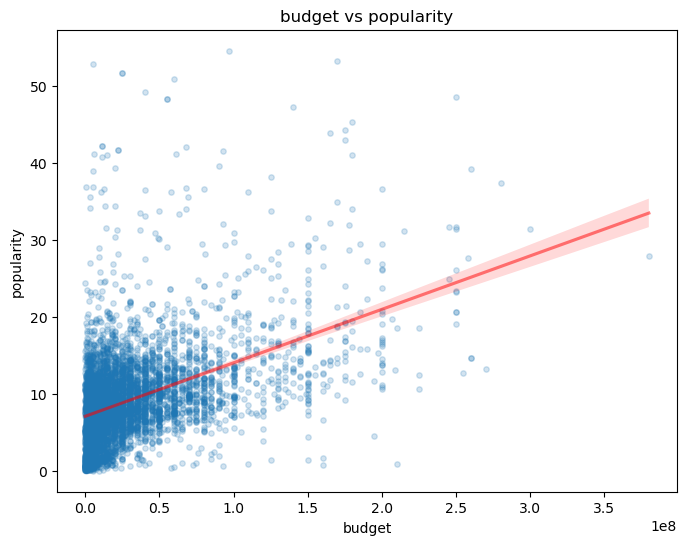

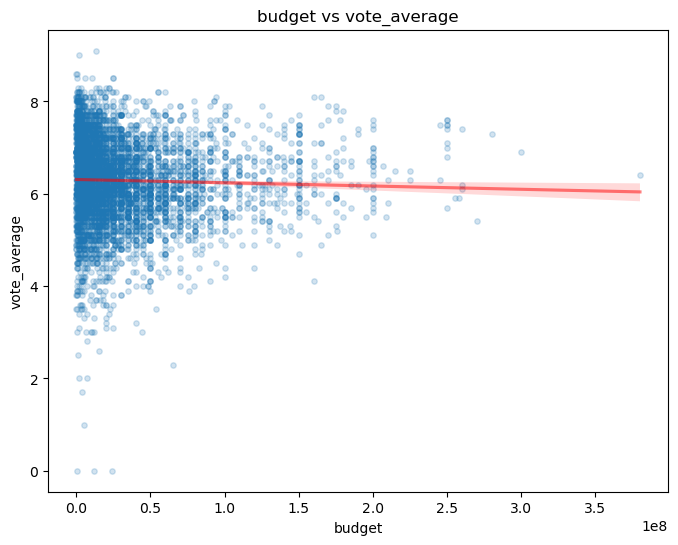

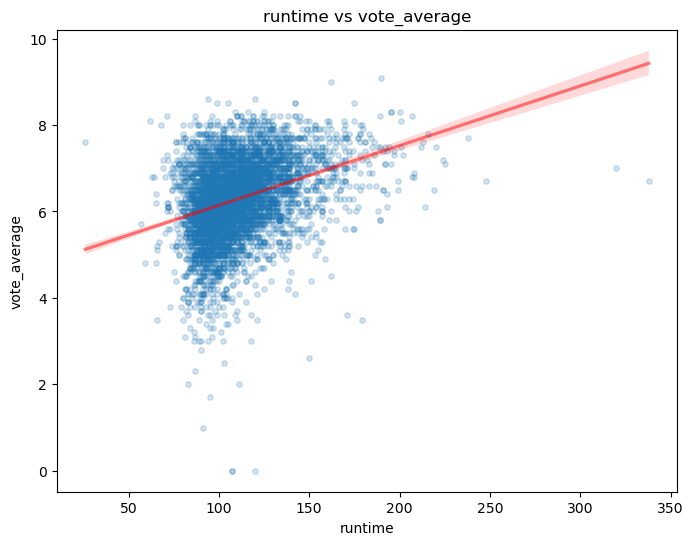

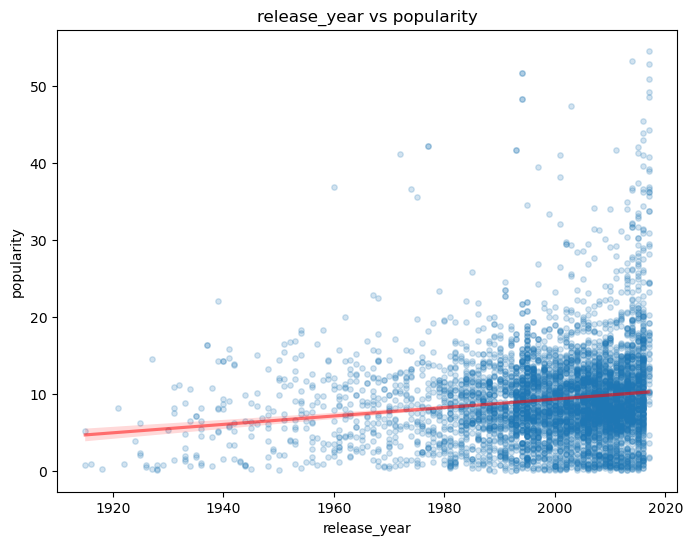

In [25]:
def scatterplot_with_regression(data, x_column, y_column):
    plt.figure(figsize=(8, 6))

    # Convert 'release_date' to numerical format
    data['release_date_numeric'] = data['release_date'].astype(int)

    sns.regplot(x=x_column, y=y_column, data=data, scatter_kws={'s': 15, 'alpha': 0.2}, line_kws={'color': 'red', 'alpha': 0.5})
    plt.title(f"{x_column} vs {y_column}")
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.show()

scatterplot_with_regression(data, x_column='budget', y_column='revenue')
scatterplot_with_regression(data, x_column='budget', y_column='popularity')
scatterplot_with_regression(data, x_column='budget', y_column='vote_average')
scatterplot_with_regression(data, x_column='runtime', y_column='vote_average')
scatterplot_with_regression(data, x_column='release_year', y_column='popularity')
